In [106]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist 

In [86]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

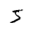

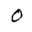

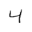

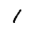

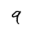

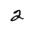

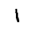

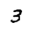

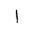

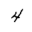

In [92]:
for i in range(10):
  plt.subplot(10,2,i+1)
  plt.imshow(xtrain[i],cmap="Greys")
  plt.axis('off')
  plt.show()

In [23]:
xtrain.shape

(60000, 28, 28)

In [94]:
xtrain=xtrain.reshape(60000,784,1).astype('float32')

In [31]:
xtrain.shape

(60000, 784, 1)

In [32]:
xtest.shape

(10000, 28, 28)

In [36]:
xtest=xtest.reshape(10000,784,1).astype('float32')

In [34]:
xtest.shape

(10000, 784, 1)

In [37]:
xtest/=255
xtrain/=255

In [38]:
xtest.shape

(10000, 784, 1)

In [42]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
net=Sequential()

In [67]:
net.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [68]:
net.add(Dense(10,activation='softmax'))

In [70]:
net.build(input_shape=xtrain.shape)

In [71]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [74]:
from keras import utils as np_utils
n=10
ytrain=keras.utils.np_utils.to_categorical(ytrain,n)
ytest=keras.utils.np_utils.to_categorical(ytest,n)

In [75]:
from tensorflow.keras.optimizers import SGD

In [76]:
net.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [78]:
mod=net.fit(xtrain,ytrain,batch_size=125,epochs=100,verbose=2)

Epoch 1/100
480/480 - 1s - loss: 0.0880 - accuracy: 0.3586 - 765ms/epoch - 2ms/step
Epoch 2/100
480/480 - 1s - loss: 0.0876 - accuracy: 0.3867 - 714ms/epoch - 1ms/step
Epoch 3/100
480/480 - 1s - loss: 0.0872 - accuracy: 0.4088 - 750ms/epoch - 2ms/step
Epoch 4/100
480/480 - 1s - loss: 0.0868 - accuracy: 0.4261 - 779ms/epoch - 2ms/step
Epoch 5/100
480/480 - 1s - loss: 0.0865 - accuracy: 0.4380 - 768ms/epoch - 2ms/step
Epoch 6/100
480/480 - 1s - loss: 0.0861 - accuracy: 0.4432 - 728ms/epoch - 2ms/step
Epoch 7/100
480/480 - 1s - loss: 0.0857 - accuracy: 0.4489 - 758ms/epoch - 2ms/step
Epoch 8/100
480/480 - 1s - loss: 0.0853 - accuracy: 0.4527 - 726ms/epoch - 2ms/step
Epoch 9/100
480/480 - 1s - loss: 0.0849 - accuracy: 0.4552 - 720ms/epoch - 2ms/step
Epoch 10/100
480/480 - 1s - loss: 0.0845 - accuracy: 0.4564 - 711ms/epoch - 1ms/step
Epoch 11/100
480/480 - 1s - loss: 0.0841 - accuracy: 0.4561 - 758ms/epoch - 2ms/step
Epoch 12/100
480/480 - 1s - loss: 0.0837 - accuracy: 0.4570 - 746ms/epoch 

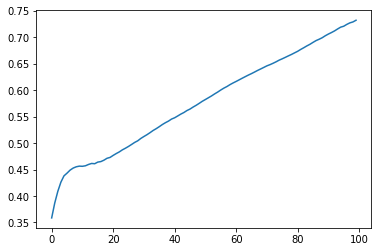

In [79]:
plt.plot(mod.history['accuracy'])

In [80]:
res=net.evaluate(xtest,ytest,verbose=2)

313/313 - 0s - loss: 0.0455 - accuracy: 0.7423 - 366ms/epoch - 1ms/step


In [83]:
print("loss=",res[0],"\naccuracy=",res[1])


loss= 0.04550406336784363 
accuracy= 0.7422999739646912


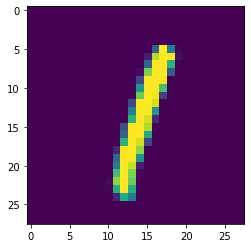

In [95]:
plt.imshow(xtest[5])

In [97]:
q=xtest[5].reshape(1,784,1).astype('float32')

In [98]:
q/=255

In [101]:
ans=net.predict(q)

1/1 [==============================] - 0s 14ms/step


In [105]:
print(format(argmax(ans)))

NameError: ignored